## Engine Co2 Emission prediction

* This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 
* Objective is to build a predictive model  using ANN which determine  the emission of CO2.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set

df = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


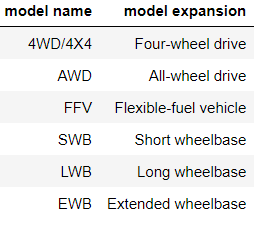  

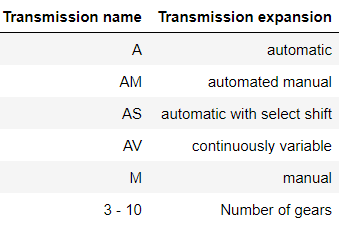

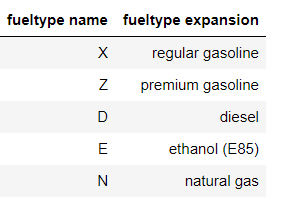

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.shape

(7385, 12)

In [7]:
print(list(df.select_dtypes(include=object).columns))
print(list(df.select_dtypes(exclude=object).columns))

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [8]:
# Observations 
#There are 12 variables and 7385 samples
#There are no null values in the data 
#out 12 there are 5 features with dtype object and remaining are numeric
#there are 11 independent varaible and 1 dependent varaible ie CO2 Emissions

### EDA

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [10]:
df_object = df.select_dtypes(include=object)
df_numeric = df.select_dtypes(exclude=object)

In [11]:
obj_col = df_object.columns

for i in obj_col:
    print(df_object[i].value_counts())
    print('*'*50)
    

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64
**************************************************
F-150 FFV 4X4           32
F-150 FFV      

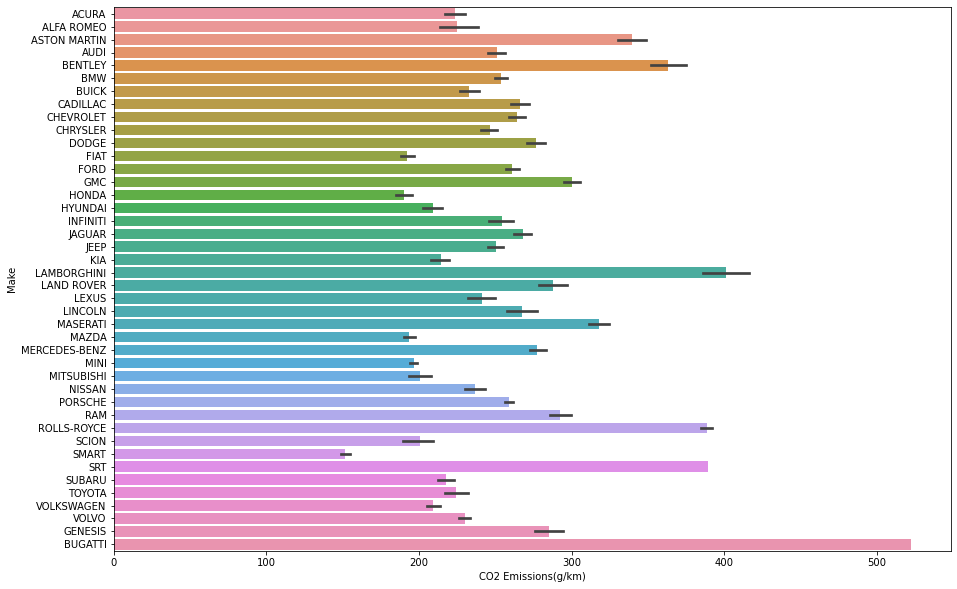

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(y=df['Make'],x =df['CO2 Emissions(g/km)'],data=df)
plt.show()

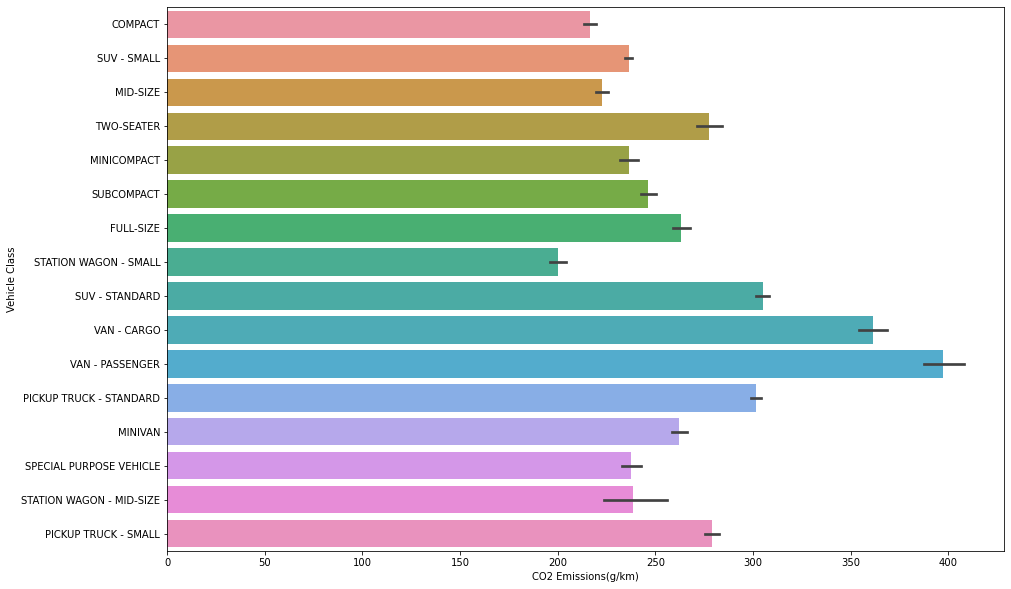

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(y=df['Vehicle Class'],x =df['CO2 Emissions(g/km)'],data=df)
plt.show()

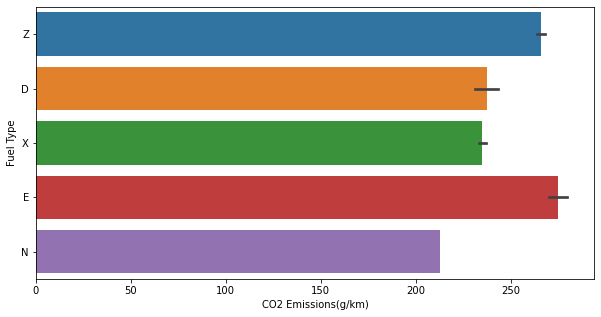

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(y=df['Fuel Type'],x =df['CO2 Emissions(g/km)'],data=df)
plt.show()

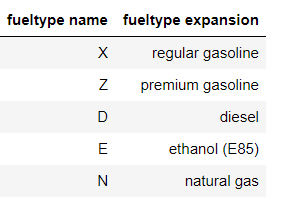

In [15]:
df_numeric

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [16]:
cor_mat = df_numeric.corr()

<AxesSubplot:>

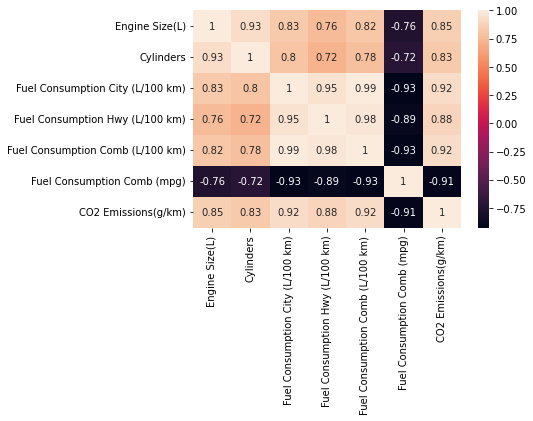

In [17]:
sns.heatmap(cor_mat,annot=True)

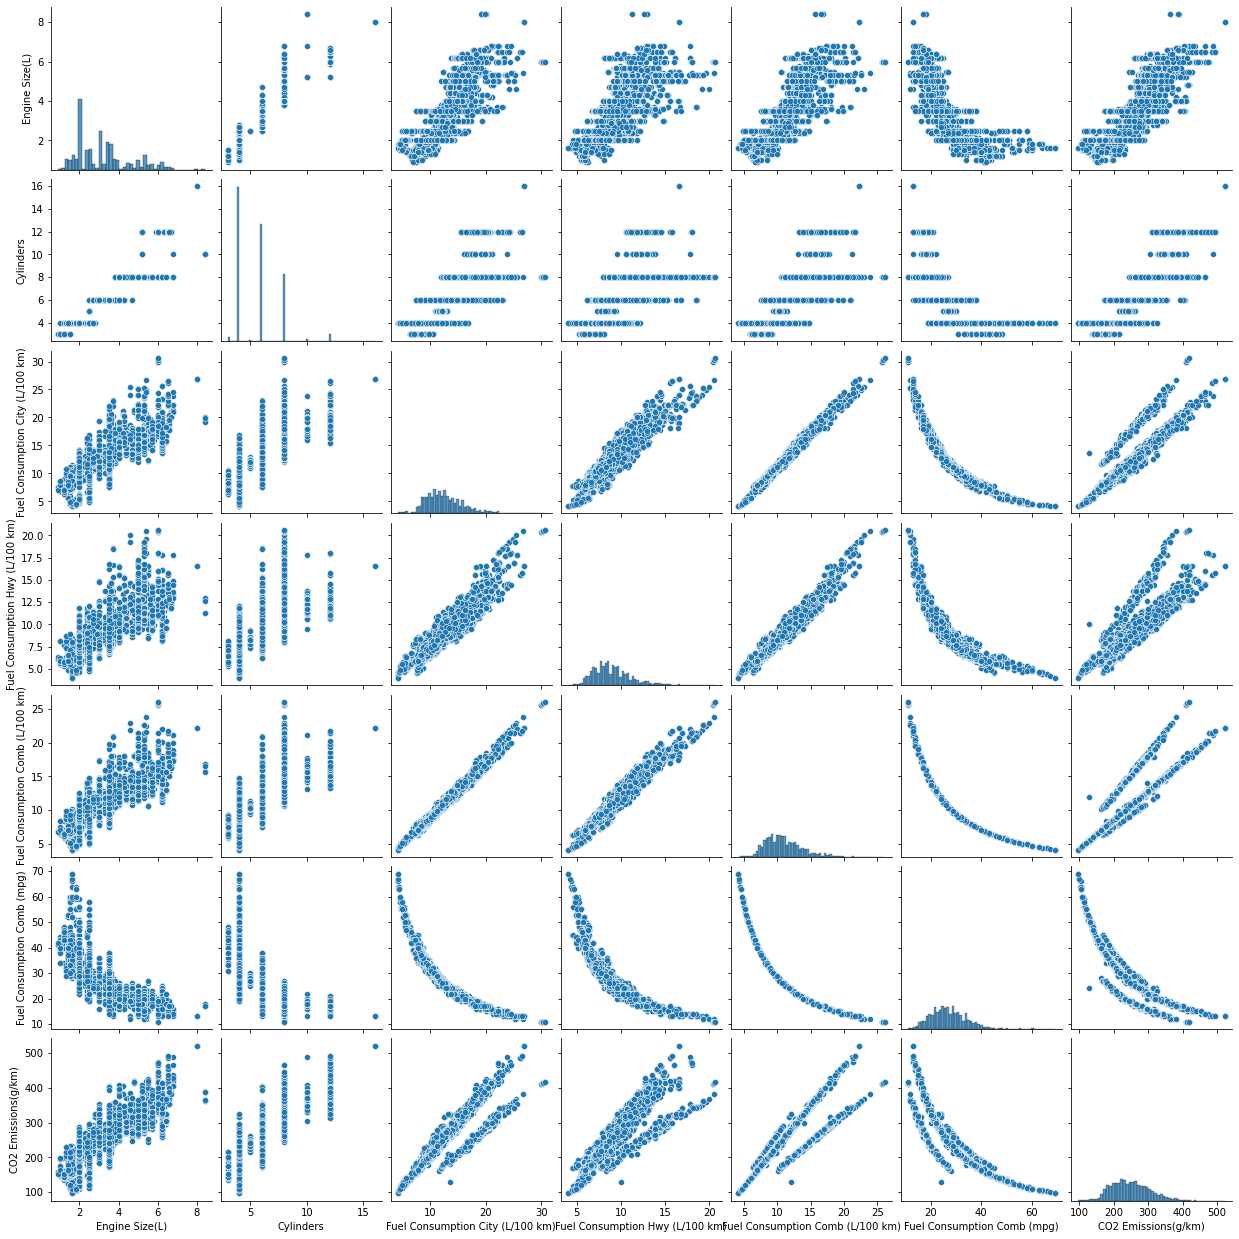

In [18]:
sns.pairplot(df_numeric)

In [19]:
# Most of the values are highly corelared with Co2 emmission 

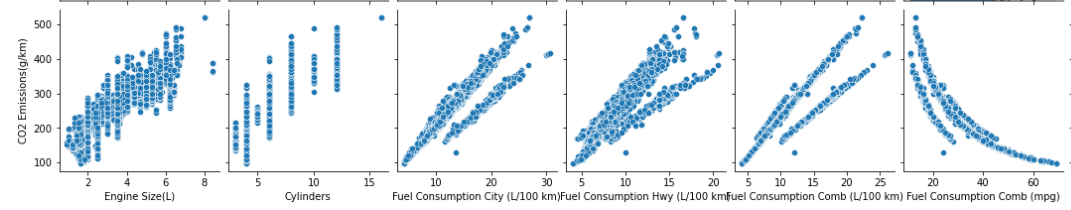

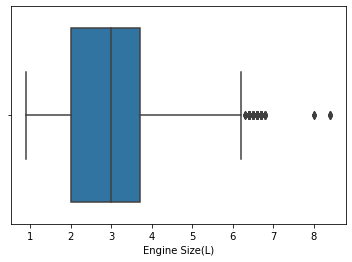

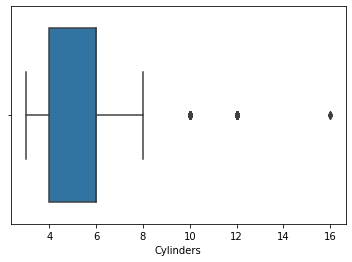

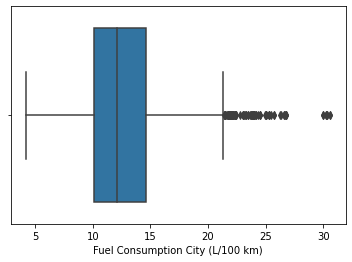

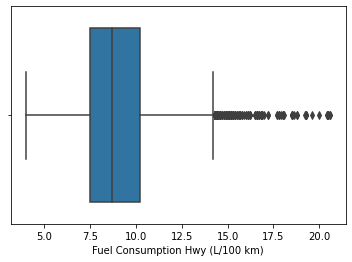

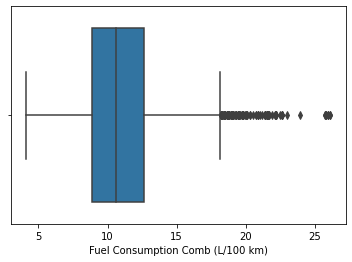

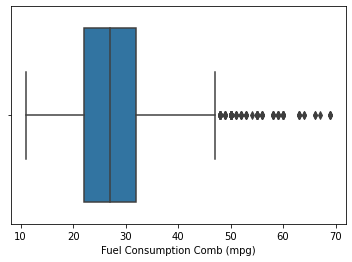

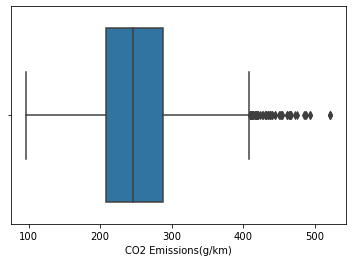

In [20]:
df_num_col = df_numeric.columns
for i in df_num_col:
    sns.boxplot(x= df_numeric[i],data=df_numeric)
    plt.show()

In [21]:
#Observations 
#In the makeLamborghini andu Bugatti causing the highest Co2 emmission
# In vehicle class Van cargo and van passenger have highest Co2 emission
#Premium gasoline and Ethanol (E80)Producing higest Co2 emission
#There is positive correlation between Co2 emission and Engine Size,Cylinders,Fuel Consumption City,Fuel Consumption Hwy
   #Fuel Consumption Comb
#There is positive correlation between Co2 emission and Fuel Consumption Comb (mpg)
#No ouliers are detected.Base on boxplot the values are normal

In [22]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [23]:
# For model building we are not considering the features like Make, Model, Vehicle class ,Transmission

In [24]:
df_model = df.drop(columns=['Make', 'Model', 'Vehicle Class','Transmission'],axis=1)

In [25]:
df_model

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,10.7,7.7,9.4,30,219
7381,2.0,4,Z,11.2,8.3,9.9,29,232
7382,2.0,4,Z,11.7,8.6,10.3,27,240
7383,2.0,4,Z,11.2,8.3,9.9,29,232


In [26]:
df_final = pd.get_dummies(data=df_model,columns=['Fuel Type'],drop_first=True)

### Feature Engineering

In [27]:
df_final

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,1


### Data splitting and feature scaling

In [28]:
X = df_final.drop(columns='CO2 Emissions(g/km)', axis=1)
y = df_final['CO2 Emissions(g/km)']

In [29]:
X

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
std = StandardScaler()

In [34]:
x_train_scl = std.fit_transform(x_train)
x_test_scl = std.transform(x_test)

In [35]:
x_train = pd.DataFrame(data=x_train_scl,columns=x_train.columns)
x_test = pd.DataFrame(data=x_test_scl,columns=x_test.columns)

In [36]:
x_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.860224,-0.883381,-0.679453,-0.744621,-0.688980,0.495252,-0.225961,-0.013011,-0.988890,1.139271
1,-0.786237,-0.883381,-1.139687,-1.423730,-1.246057,1.471034,-0.225961,-0.013011,-0.988890,-0.877754
2,-1.008196,-0.883381,-2.319034,-1.876470,-2.186125,4.537775,-0.225961,-0.013011,1.011234,-0.877754
3,-0.120359,0.209950,-0.046633,-0.110786,-0.062268,-0.201734,-0.225961,-0.013011,-0.988890,1.139271
4,-1.008196,-0.883381,-1.024628,-1.016265,-1.037153,1.052842,-0.225961,-0.013011,1.011234,-0.877754
...,...,...,...,...,...,...,...,...,...,...
5903,-0.120359,0.209950,0.039661,0.025036,0.042184,-0.341132,-0.225961,-0.013011,-0.988890,1.139271
5904,2.247206,1.303281,1.075185,1.156884,1.121521,-1.038119,-0.225961,-0.013011,-0.988890,1.139271
5905,1.581328,1.303281,2.081946,2.198184,2.166041,-1.595708,4.425536,-0.013011,-0.988890,-0.877754
5906,-0.564278,-0.883381,-0.276749,-0.020238,-0.201537,-0.062337,-0.225961,-0.013011,1.011234,-0.877754


In [37]:
x_test

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,1.581328,1.303281,0.931363,1.066336,0.982252,-1.038119,-0.225961,-0.013011,1.011234,-0.877754
1,0.323559,0.209950,0.586188,0.477775,0.564444,-0.759324,-0.225961,-0.013011,1.011234,-0.877754
2,2.099233,3.489942,1.420360,1.066336,1.295608,-1.177516,-0.225961,-0.013011,-0.988890,1.139271
3,-0.860224,-0.883381,-0.449337,-0.608800,-0.514893,0.355855,-0.225961,-0.013011,-0.988890,1.139271
4,-0.120359,0.209950,0.413600,0.160857,0.320722,-0.480529,-0.225961,-0.013011,-0.988890,1.139271
...,...,...,...,...,...,...,...,...,...,...
1472,-1.008196,-0.883381,-2.232740,-1.604826,-2.046856,3.840789,-0.225961,-0.013011,1.011234,-0.877754
1473,0.619505,1.303281,0.988892,0.658871,0.877800,-0.898721,-0.225961,-0.013011,-0.988890,1.139271
1474,0.323559,0.209950,-0.075397,-0.382430,-0.201537,-0.062337,-0.225961,-0.013011,1.011234,-0.877754
1475,-0.120359,0.209950,0.241013,0.341953,0.285905,-0.480529,-0.225961,-0.013011,1.011234,-0.877754


In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5908, 10)
(1477, 10)
(5908,)
(1477,)


## Model Buidlding using ANN

In [39]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [40]:
model = Sequential()

In [41]:
model.add(Dense(15,input_dim=10,activation ='relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(1))


In [42]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [43]:
model.fit(x_train,y_train,batch_size=20, epochs=100)

Epoch 1/100
296/296 [==============================] - 2s 2ms/step - loss: 239.1684
Epoch 2/100
296/296 [==============================] - 1s 2ms/step - loss: 129.2525
Epoch 3/100
296/296 [==============================] - 1s 2ms/step - loss: 64.9982
Epoch 4/100
296/296 [==============================] - 1s 2ms/step - loss: 25.0914
Epoch 5/100
296/296 [==============================] - 1s 2ms/step - loss: 8.6164
Epoch 6/100
296/296 [==============================] - 1s 2ms/step - loss: 6.0958
Epoch 7/100
296/296 [==============================] - 1s 2ms/step - loss: 4.8024
Epoch 8/100
296/296 [==============================] - 1s 2ms/step - loss: 4.3144
Epoch 9/100
296/296 [==============================] - 1s 2ms/step - loss: 4.0629
Epoch 10/100
296/296 [==============================] - 1s 2ms/step - loss: 3.8104
Epoch 11/100
296/296 [==============================] - 1s 2ms/step - loss: 3.6104
Epoch 12/100
296/296 [==============================] - 1s 2ms/step - loss: 3.4092
Epoch 1

296/296 [==============================] - 1s 2ms/step - loss: 2.1688
Epoch 100/100
296/296 [==============================] - 1s 2ms/step - loss: 2.1544


In [44]:
y_predict = model.predict(x_test)

47/47 [==============================] - 0s 2ms/step


In [45]:
y_predict

array([[324.82413],
       [295.6306 ],
       [344.98495],
       ...,
       [243.71992],
       [275.36734],
       [296.20743]], dtype=float32)

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
mae = mean_absolute_error(y_test,y_predict)

In [48]:
mae

2.2452644394633734